<hr style="color: yellow;border-color: yellow;">

Date: April 2023
<hr style="color: yellow;border-color: yellow;">

##  <span style="color:magenta"> Introduction </span>

<hr style="color: gray;">

###  <span style="color:magenta"> Background </span>

The use of advanced machine learning models is revolutionizing the medical field by improving the detection and diagnosis of diseases such as dementia, diabetes, and cancer. However, due to the complexity of neuropsychiatric disorders like schizophrenia and the lack of sufficient data, machine learning has not yet been successful in unlocking the secrets of these disorders. Schizophrenia is a severe disorder that manifests through positive, negative, and cognitive symptoms, and the underlying biological mechanisms of the disorder are still not fully understood despite research indicating that several hundred genes may be implicated. Diagnosis is currently based on behavior and functional impairment, and there is no objective diagnostic test. Although it is hoped that machine learning can aid in the accurate identification and treatment of individuals with schizophrenia, this requires high-quality data and a better understanding of the disorder. Healthcare professionals and machine learning scientists/engineers should work together to utilize the potential of machine learning in healthcare while being mindful of the potential limitations and side effects of using historical medical data.

<hr style="color: gray;">

###  <span style="color:magenta"> Aims of the Project </span>

The data set used in this project is based on a dataset of 5,000 people's lifestyle and symptoms, but it is a modified version of a synthetic dataset that was presented at the ACM Conference on Fairness, Accountability, and Transparency in 2022. The dataset is a comma-separated file that consists of 27 columns with both numerical and categorical features. The main variable of interest, "Diagnosis," is binary, where a value of 1 indicates that the person has a schizophrenia-like illness and a value of 0 indicates that they do not.
<br><br> 
The following are the aims of this project.


    - (1) Data pre-processing and exploratory data analysis (EDA)
* Identifying and processing any missing, duplicated or erroneous values
* Where appropriate,applying transformations on the data and encoding categorical features
* Feature extraction & selection

    - (2) Dimension Reduction
* Applying principal component analysis (PCA) to see if a smaller
number of features can adequately summarize the data

    - (3) supervised machine learning analysis
* Utilising features acquired from pre-processing and pre-processing, EDA and PCA, conduct logistic regression and random forests learning aimed at classifying cases of the schizophrenia-like illness (Diagnosis=1) from controls (Diagnosis=0)
* Compare the performance of the respective machine learning models with and without pca, as well as the performance of the logistic regression models and the random forests models with each other.

    - (4) Conclusion, Evaluations & Recommendations

<hr style="color: yellow;border-color: yellow;">

In [92]:
#----------------------------------------------------
# Import packages
#----------------------------------------------------

raw_data = pd.read_csv("MS4H03_Dataset.csv")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as met
from sklearn.metrics import accuracy_score

sns.set_context('poster')

import missingno as msno 
from IPython.display import Markdown as md  
from IPython.display import display, Latex
pd.set_option('display.max_columns', None)

In [93]:
#----------------------------------------------------
# Import data from csv file;
#----------------------------------------------------
raw_data = pd.read_csv("MS4H03_Dataset.csv")

In [94]:
#----------------------------------------------------
# (1) Initial EDA
#----------------------------------------------------

display(md("<hr style=\"color: yellow\"> \n <h1 style=\"color: magenta\"> (1) EDA \n </h1> "))

# (1.1) Preview of 'raw data'
display(md("<hr style=\"color: yellow\"> \n <h2 style=\"color: magenta\"> (1.1) Preview of 'raw_data'\n </h2> "))
display(raw_data.head())

<hr style="color: yellow"> 
 <h1 style="color: magenta"> (1) EDA 
 </h1> 

<hr style="color: yellow"> 
 <h2 style="color: magenta"> (1.1) Preview of 'raw_data'
 </h2> 

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,Hallucination,Housing,Intrusive_Thoughts,Participant,Passive,Pregnant,Psychomotor,Race,Rumination,Sex,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,Yes,1.170842,8.177884,8.305502,12.831823,Stable,6.648416,1,4.385417,0.0,3.854579,White,5.041432,Female,6.552082,5.915492,3.991749,6.371877,4.537270,3.744410,5.242819
1,0,5.432608,0.307721,25.809400,5.060206,0.062209,Yes,2.272548,11.162913,5.060206,38.979963,Stable,4.873116,1,2.491285,NaN,5.821110,White,4.656790,Male,5.558434,4.008265,NaN,2.238665,6.113746,0.720458,3.797242
2,0,6.557500,-1.412208,24.842012,6.504229,0.071532,No,1.439095,5.887363,6.504229,11.296530,Stable,7.924018,1,-999.000000,0.0,7.893102,Black,7.290494,Female,5.787561,7.177926,NaN,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,No,1.380185,8.943851,6.994948,4.237368,Stable,NaN,1,-999.000000,0.0,3.812874,White,6.759339,Female,6.787287,2.866815,NaN,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.808490,5.869212,0.004214,Yes,1.237976,6.741627,5.869212,0.863636,Stable,5.650523,1,7.999254,NaN,5.119658,Black,6.190019,Male,7.748312,6.798220,5.103103,5.063542,4.213723,0.705895,6.547707


In [95]:
#----------------------------------------------------
# (1.2) Descriptive Statistics of 'raw_data'
#----------------------------------------------------
# (1.2A) Numeric Columns: Central Tendency & Variability Table
#----------------------------------------------------

display(md("<hr style=\"color: yellow\"> \n <h2 style=\"color: magenta\"> \n (1.2) Descriptive Statistics of 'raw_data' </h2> " ))
display(md("<hr style=\"color: grey\">  \n <h3 style=\"color: magenta\"> \n (1.2A) Numeric Columns: Central Tendency & Variability Table </h3> " ))

raw_data.describe(include='all') 
desc = raw_data.describe()

# Create a field called 'nans', which counts the number of NaN values in each column. Add to Description table.
desc.loc['nans', :] = raw_data.isna().sum().astype(int)
display(desc) 

<hr style="color: yellow"> 
 <h2 style="color: magenta"> 
 (1.2) Descriptive Statistics of 'raw_data' </h2> 

<hr style="color: grey">  
 <h3 style="color: magenta"> 
 (1.2A) Numeric Columns: Central Tendency & Variability Table </h3> 

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,Intrusive_Thoughts,Participant,Passive,Pregnant,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4170.000000,5000.0,5000.000000,2762.000000,5000.000000,5000.000000,5000.000000,5000.000000,2127.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.505800,6.502860,2.478849,27.070029,6.519924,0.279407,2.637389,5.727062,6.519924,65.073832,5.702358,1.0,-421.766251,0.101376,4.680583,5.685816,7.011266,4.916418,2.754909,4.920667,inf,2.480266,3.958121
std,0.500016,1.488151,1.730810,14.202618,1.474846,0.834494,1.440347,3.284501,1.474846,223.943469,2.374921,0.0,496.314191,0.301880,1.482692,2.161891,1.410841,2.220262,1.496126,1.962342,NaN,1.410475,1.469444
min,0.000000,1.098854,-3.211011,0.141074,1.299964,0.000187,-2.127037,0.000000,1.299964,0.027350,-1.386416,1.0,-999.000000,0.000000,-0.024974,-0.409032,2.144726,-3.257788,-2.346238,-2.183456,0.366650,-1.981307,-0.825919
25%,0.000000,5.495361,1.265128,16.724108,5.528181,0.018655,1.629919,4.678095,5.528181,4.113962,3.971305,1.0,-999.000000,0.000000,3.697870,4.042552,6.058402,3.443683,1.703462,3.565482,4.491580,1.486439,2.969534
50%,1.000000,6.485527,2.427409,25.165292,6.498042,0.064259,2.558146,6.752196,6.498042,12.764604,5.572865,1.0,3.272512,0.000000,4.720156,5.521805,6.980519,5.096416,2.735108,5.247353,5.513508,2.388994,3.962131
75%,1.000000,7.489218,3.642059,35.447666,7.519759,0.215773,3.588012,8.045706,7.519759,41.814204,7.363294,1.0,5.114966,0.000000,5.682627,7.276673,7.977138,6.531673,3.725759,6.385145,6.569176,3.426667,4.972302
max,1.000000,11.603140,8.803433,113.438734,11.649649,21.001327,8.978785,12.003550,11.649649,6287.163151,13.209009,1.0,9.799751,1.000000,10.171540,12.009666,11.920312,11.970952,8.212275,9.622076,inf,8.066822,9.022207
nans,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,830.000000,0.0,0.000000,2238.000000,0.000000,0.000000,0.000000,0.000000,2873.000000,0.000000,0.000000,0.000000,0.000000


In [96]:
#----------------------------------------------------
# (1.2B) Numeric Columns: Pearson's Correlation Table
#----------------------------------------------------

display(md("<hr style=\"color: grey\"> <h3 style=\"color: magenta\"> \n (1.2B) Numeric Columns: Pearson's Correlation Table </h3> " ))

# Fill diagonal and upper half with NaNs    
# (this block of code was taken from: "https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas")
corr = raw_data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
display((corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
 .format(precision=2)
 ))

<hr style="color: grey"> <h3 style="color: magenta"> 
 (1.2B) Numeric Columns: Pearson's Correlation Table </h3> 

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,Intrusive_Thoughts,Participant,Passive,Pregnant,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
Diagnosis,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Anhedonia,-0.33,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Apathy,0.32,-0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Appetite,-0.01,0.03,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Concentration,0.33,-0.10,0.11,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Content,-0.13,0.05,-0.06,-0.03,-0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Delusion,0.41,-0.14,0.15,-0.01,0.12,-0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Dep_Mood,-0.08,-0.00,-0.03,-0.01,-0.04,0.03,-0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Focus,0.33,-0.10,0.11,-0.02,1.00,-0.04,0.12,-0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Hallucination,0.17,-0.05,0.03,-0.00,0.04,-0.03,0.45,-0.01,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [97]:
#----------------------------------------------------
# (1.2C) Object Columns
#----------------------------------------------------

# (1.2Ci) Object Columns: Description
display(md("<hr style=\"color: grey\"> <h3 style=\"color: magenta\"> \n (1.2Ci) Object Columns: Description </h3> " ))
display(raw_data.describe(include='object'))

# (1.2Cii) Distribution count of Categories in 'Race' Column
display(md("<hr style=\"color: grey\"> <h3 style=\"color: magenta\"> \n (1.2Cii) Distribution count of Categories in 'Race' Column </h3> " ))
display(raw_data.loc[:, 'Race'].value_counts())
display(md("<hr style=\"color: grey\"> " ))

<hr style="color: grey"> <h3 style="color: magenta"> 
 (1.2Ci) Object Columns: Description </h3> 

,Delay,Housing,Race,Sex
count,5000,5000,5000,5000
unique,2,2,4,2
top,Yes,Stable,White,Female
freq,2571,4674,1838,2762


<hr style="color: grey"> <h3 style="color: magenta"> 
 (1.2Cii) Distribution count of Categories in 'Race' Column </h3> 

White       1838
Black       1741
Hispanic     715
Asian        706
Name: Race, dtype: int64

<hr style="color: grey"> 

<hr style="color: yellow"> 
 <h2 style="color: magenta"> (1.3) Histogram Distribution of Numeric Columns in 'raw_data' </h2> 

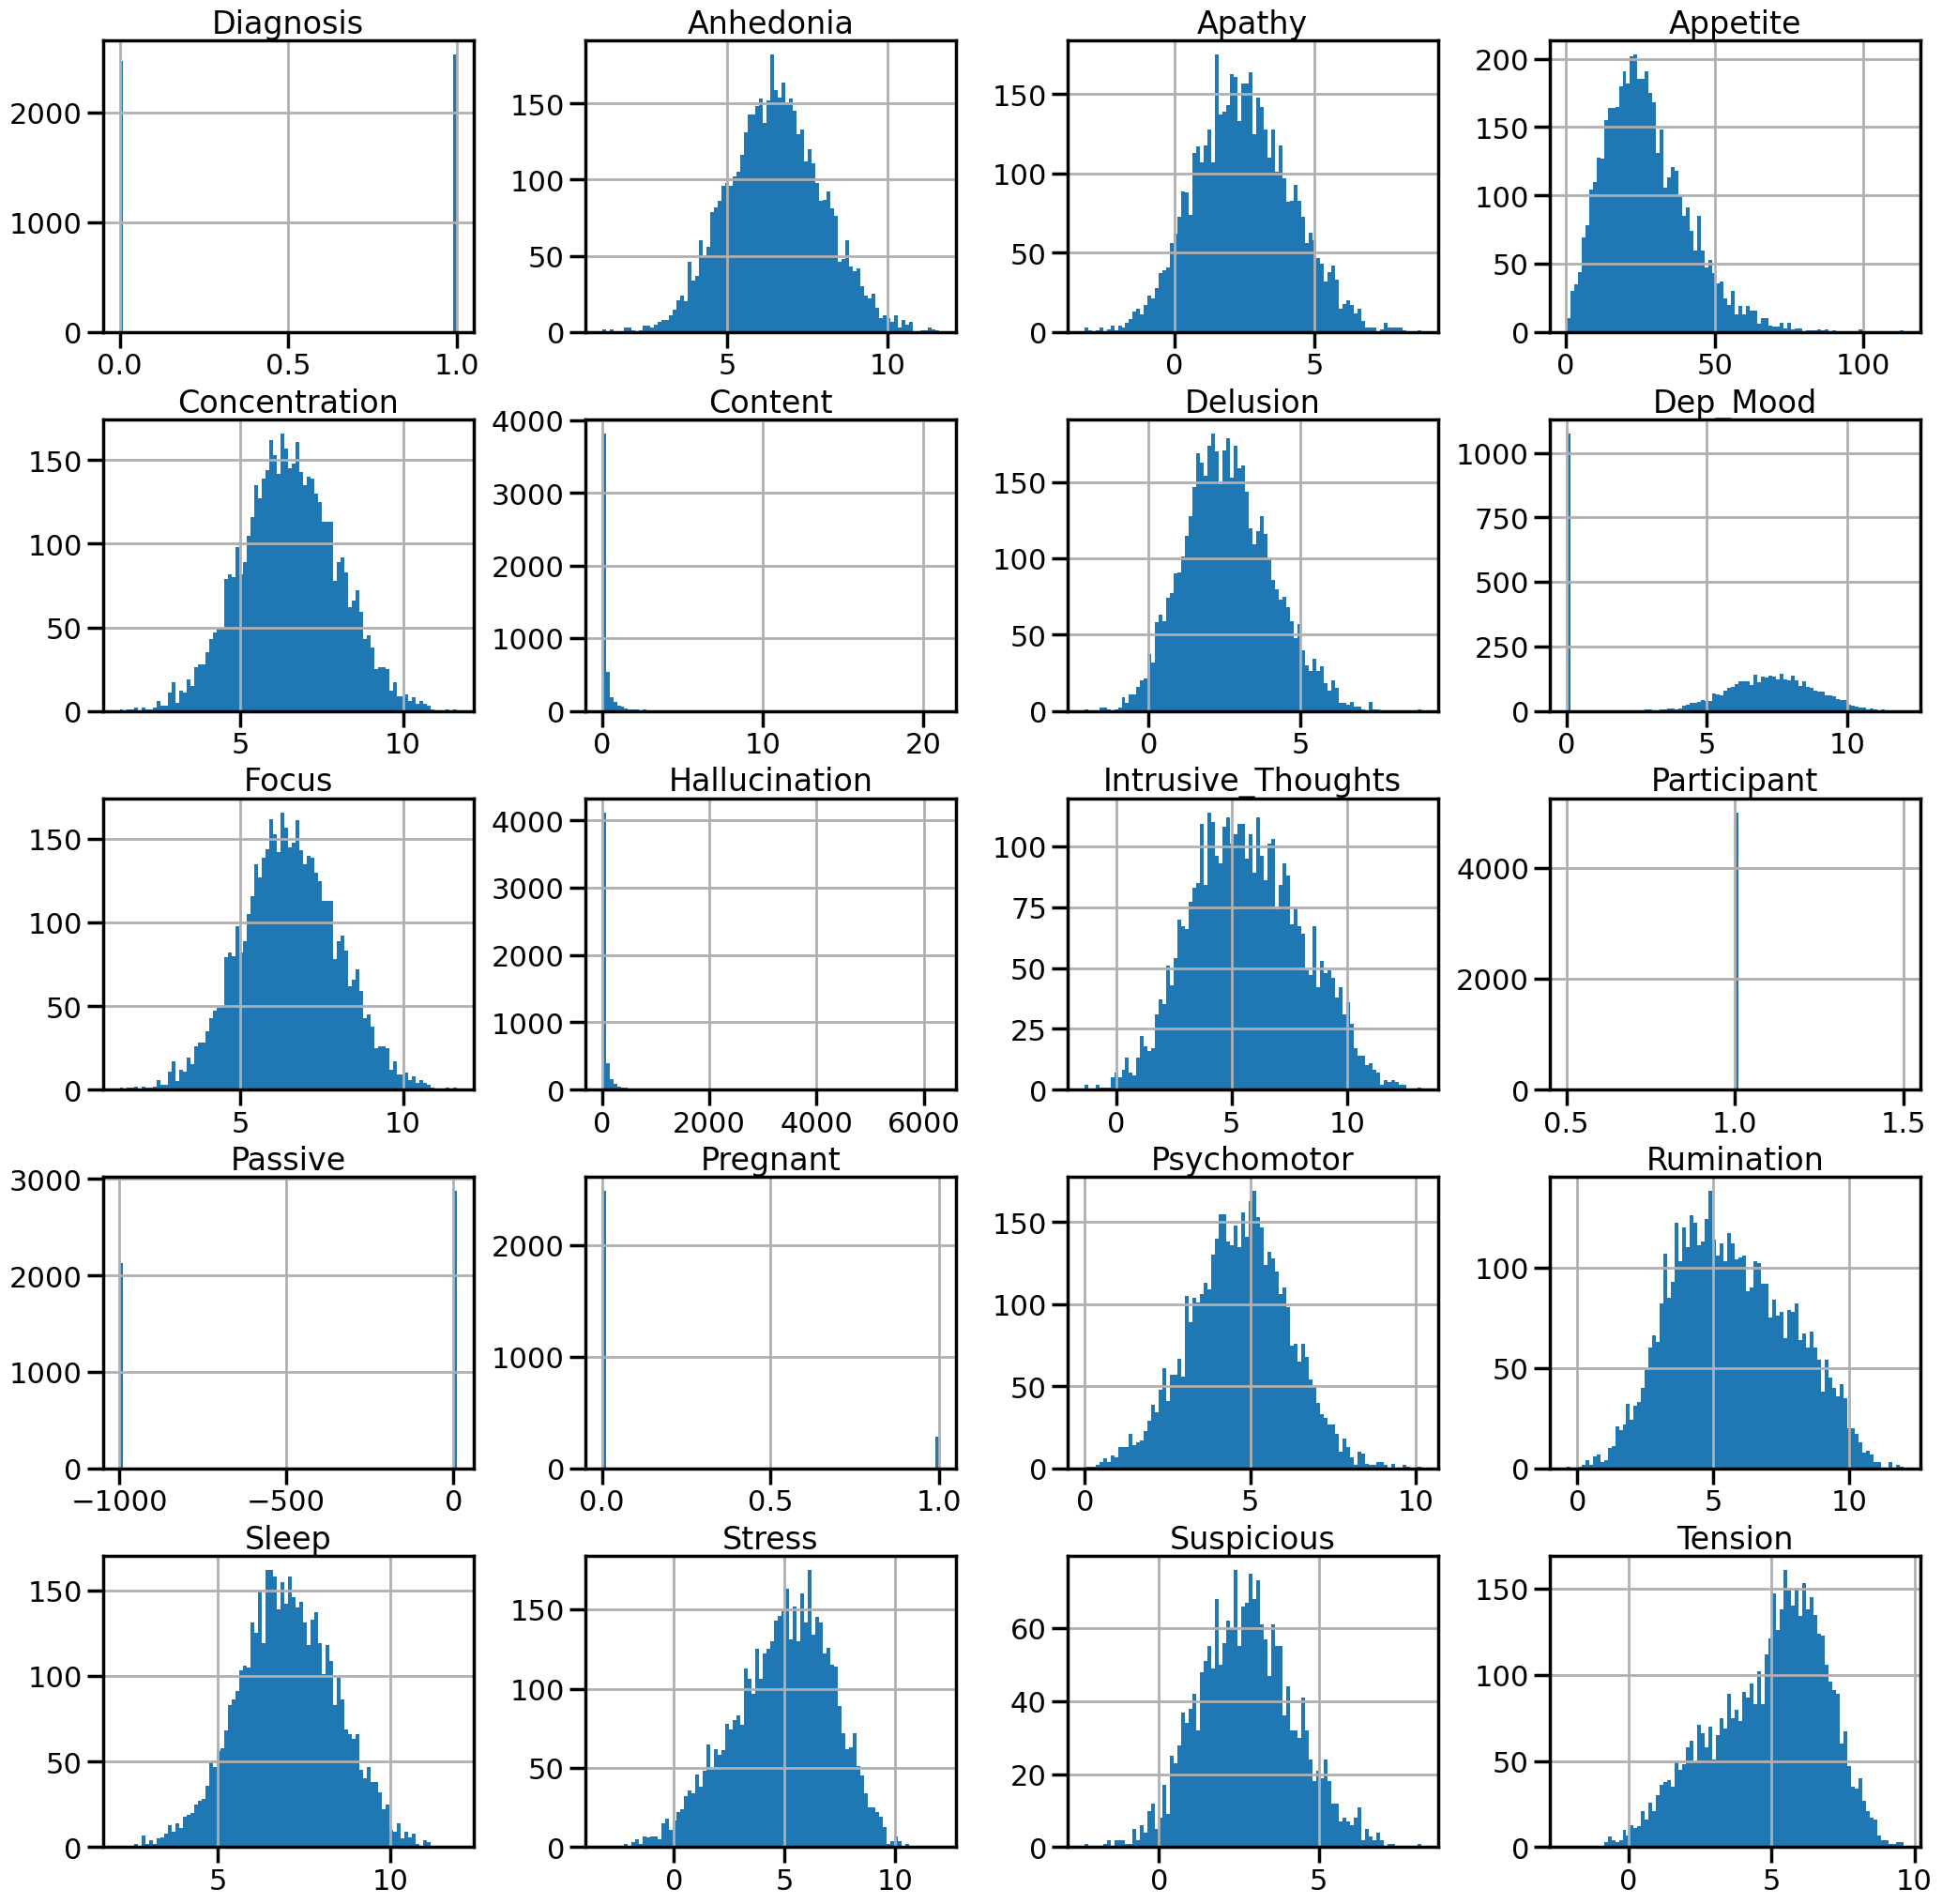

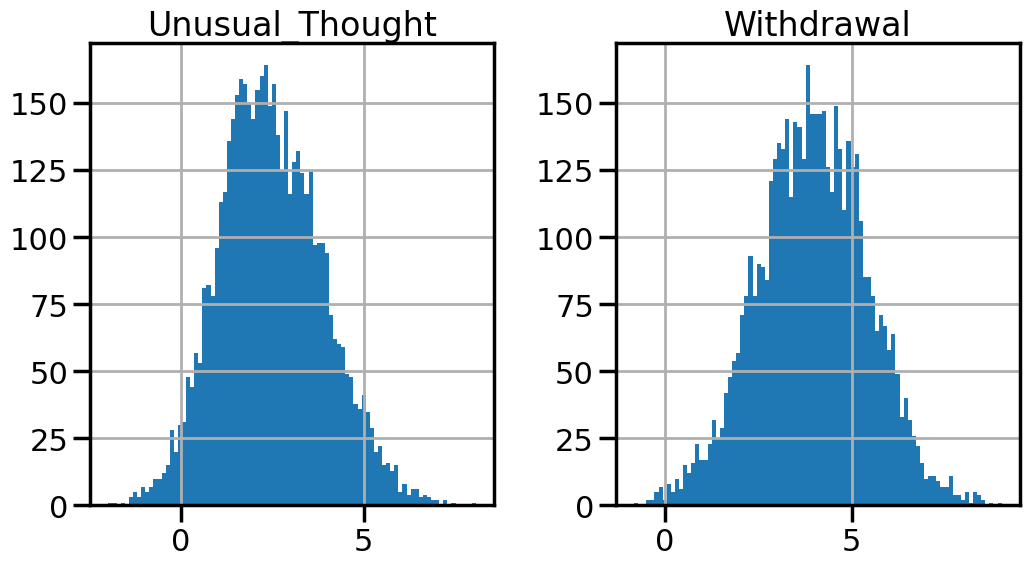

In [98]:
#----------------------------------------------------
# (1.3) Histogram Distribution of columns in 'raw_data'
#----------------------------------------------------

display(md("<hr style=\"color: yellow\"> \n <h2 style=\"color: magenta\"> (1.3) Histogram Distribution of Numeric Columns in 'raw_data' </h2> " ))

""" 
The last two columns of 'raw_data' that come after the column 'Tired' have not been
plotted in a histogram because python threw an error while trying to plot 'Tired'; 
python won't continue after an error, so the last two columns need to be plotted here separately.
"""

# Histogram of Columns before 'Tired'
raw_data.iloc[:,:24].hist(figsize=(25,25), bins=90)
plt.show()

# Histogram of Last 2 Columns after 'Tired'
raw_data.iloc[:,25:27].hist(figsize=(12,6), bins=90)
plt.show()

<hr style="color: yellow;border-color: yellow;">

##  <span style="color:magenta"> (1.4) Remarks on Columns in 'raw_data' </span>
<hr style="color: gray;">

Based on tables from Sections (1.1) - (1.3), we can make some initial remarks about the variables in 'raw_data'. 
<hr style="color: gray;>

### <h3 style="color:magenta"> (1.4A) Variables Needing Encoding or Log-Transform & Redundant Variables </h3> 

Column Name | (1.1) | (1.2) | (1.3) | Remarks
 ------------ | ------------- | ------------- | ------------- | -------------
 <font color='magenta'> **(1.4Ai)** </font><br><br>**'Delay'** <br> & <br>  **'Housing'** <br> & <br>  **'Race'** <br> & <br>  **'Sex'** | - categorical data, object data type | - Descriptive statistics show that all variables have 2 categories, except 'Race', which has 4 categories. <br><br> - Note that the distribution counts of the categories in the variables range between 706 and 2762, so between 14.12% and 55.24%, except for 'Housing'. <br><br> - 'Housing' has 4674 observations in the 'Stable' category, accounting for 93.48% of all data points. | - Histogram unavailable because data is not numerical. |  - Varialbes <font color='aqua'> **need converting to numerical binary form, ie. encoding** </font>, with 0 value for 'No' and 1 for 'Yes'. <br><br> - A note must be made regarding the 'Housing' variable's highly uneven distribution between it's 'Stable' and 'Unstable' categories. In order to preserve the information from the 'Housing' variable into the training of the model, during the stratified test-train split of the data, it is advisable to <font color='aqua'> **incorporate 'Housing' into the stratified variables** </font>.
<font color='magenta'> **(1.4Aii)** </font><br><br>**'Content'** <br> & <br>  **'Hallucination'** | N/A | **'Content'** <br> - The maximum value appears considerably higher than the minimum and mean values. <br> mean: 0.279407  <br> min: 0.000187  <br> max: 21.001327 <br><br>  **'Hallucination'** <br> - The maximum value appears exceptionally high considering the minimum, 2nd quartile (mode), 3rd quartile and mean values. <br> min: 0.027350  <br> Q2: 12.764604  <br> Q3: 41.814204  <br> mean: 65.073832 <br> max: 6287.163151 | - Both histograms suggests negative exponential distribution. | - <font color='blue'> **Needs further investigating through a data transformation method,  for example the log transform,** </font> to see whether the extreme values are part of the respective exponential distributions or whether they might be outliers.
 <font color='magenta'> **(1.4Aiii)** </font><br><br>**'Concentration'**<br> & <br> **'Participant'**  | N/A | **'Concentration'** <br> - Table (1.2B) shows a correlation of 1 with the column 'Focus'. <br><br>  **'Participant'**<br> -  Given that the descriptibe statistics in this table have an accuracy of 6 decimal places, based on the standard deviation being equal to zero it can be seen all the entries in this field  have the same value. <br> - From the descriptive statistics of min and max, we see that that value is equal to 1.<br>std: 0  <br>  min: 1 <br> max: 1  | N/A | - <font color='red'> **Redundant variables**</font>, so need to be removed. 'Concentration' is a duplicate of the 'Focus' column (as suggested by the column names), and 'Participant' is a constant.
 <br><br>
<hr style="color: gray;>

 ###  <h3 style="color:magenta"> (1.4B) Variables with Erroneous & Missing Values</h3> 
 Column Name | (1.1) | (1.2) | (1.3) | Remarks
 ------------ | ------------- | ------------- | ------------- | -------------
 <font color='magenta'> **(1.4Biv)** </font><br><br>**'Dep_Mood'** | N/A | N/A | - Histogram suggests normal distribution with most visible values located in the approximate range between 3 and 12, however outside of this bell curve, there are over a thousand observations near the value 0. |  - Needs further investigation as there is a <font color='green'> possibility of **erroneous values** </font> near 0. <br><br> - If erroneous values can be confirmed, they must be replaced with NaN values and need to <font color='green'> **impute missing values.** </font>.
 <font color='magenta'> **(1.4Bv)** </font><br><br>**'Intrusive_Thoughts'** <br> & <br> **'Suspicious'** | N/A | - 'Intrusive_Thoughts' and 'Suspicious' have 830 and 2127 missing (NaN) values respectively, which respectively correspond to 16.6% and 42.54% of the overall data. | N/A | - Need to <font color='green'> **impute missing values** </font>; for 'Suspicious' dropping the column altogether may be considered as the percentage of missing values is over 40%.
 <font color='magenta'> **(1.4Bvi)** </font><br><br>**'Passive'**  | N/A | - As seen from the descriptive statistics of min, 1st, 2nd, 3rd and 4rth (max) quartile, between 25% to 50% of the overall data is populated by values exactly equal to -999, and out of the remaining data, between 25% to 50% rest of the overall data takes values between 3.272512 and 9.799751. Taking into consideration also the standard deviation value, it appears that there are likely two distrinct groupings of the values taken in this field, one grouping near -999 and anoother near the interval between 3 and 10. <br><br> min: -999  <br> 1st quartile: -999  <br> 2nd quartile: 3.272512 <br> 3rd quartile: 5.114966 <br> max: 9.799751  <br> std: 496.314191 | - The histogram does indeed show two distinct groupings of the data, with around 2200 values (over 40%) occurring near -999 and around 2800 values occurring near 0. | - It is known that sometimes missing/erroneous values in a dataset are coded as -999, which appears to be the case here. To add credibility to this inference, a histogram plot without -999 values can be created to see what the shape of the rest of the values in this column look like.<br><br> - Need to <font color='green'> **impute missing values** </font>; the -999 must be first replaced with NaNs, before imputing. <br><br> - The possibility of dropping the column altogether can also be considered, as the proportion of missing values would be over 40%. 
<font color='magenta'> **(1.4Bvii)** </font><br><br> **'Pregnant'**  | N/A | - A total of 2238 NaN values, 44.76% of all entries.<br><br> - Binary data of 0 and 1 for non NaN entries. | N/A | - NaN values in this field will be interpreted as records indicative of participants who do not have the capability of being pregnant, so it will be assumed that this is *structurally missing data*. <br><br> - Therefore, imputing or dropping the column are not suitable options, so need to <font color='green'> **replace missing values with 0.** </font>
<font color='magenta'> **(1.4Bviii)** </font><br><br>**'Tired'**  | N/A | - The mean and max values are equal to infinity.<br><br>mean: inf <br> max: inf |- Histogram unavailable because of the presence of infinity value in data point(s); when trying to plot the histogram, python displayed a value error exactly because of this column: <br><br> *"ValueError: supplied range of [0.366650091, inf] is not finite"*. | - The inf value(s) in this field will be interpreted as NaN; it will be assumed that this is is ** missing at random data*. <br><br> - Therefore, need to <font color='green'> **impute missing data** </font>

<hr style="color: yellow;border-color: yellow;">

##  <span style="color:magenta"> (1.5) Further EDA </span>

<hr style="color: yellow;border-color: yellow;">

###  <span style="color:magenta"> (1.5A) Encoding, Log-Transformations, Redundant Variables </span>

In [99]:
#----------------------------------------------------
# Encoding Categorical variables into numerical form
#----------------------------------------------------

# Resource used: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
for var_to_encode in ['Sex', 'Housing', 'Race', 'Delay']:
    two_values_bool = raw_data.loc[:, var_to_encode].unique().size == 2
    encoded = pd.get_dummies(raw_data.loc[:, var_to_encode], drop_first=two_values_bool, prefix=var_to_encode)
    raw_data = raw_data.drop(var_to_encode, axis=1)
    raw_data = pd.concat([raw_data, encoded], axis=1)

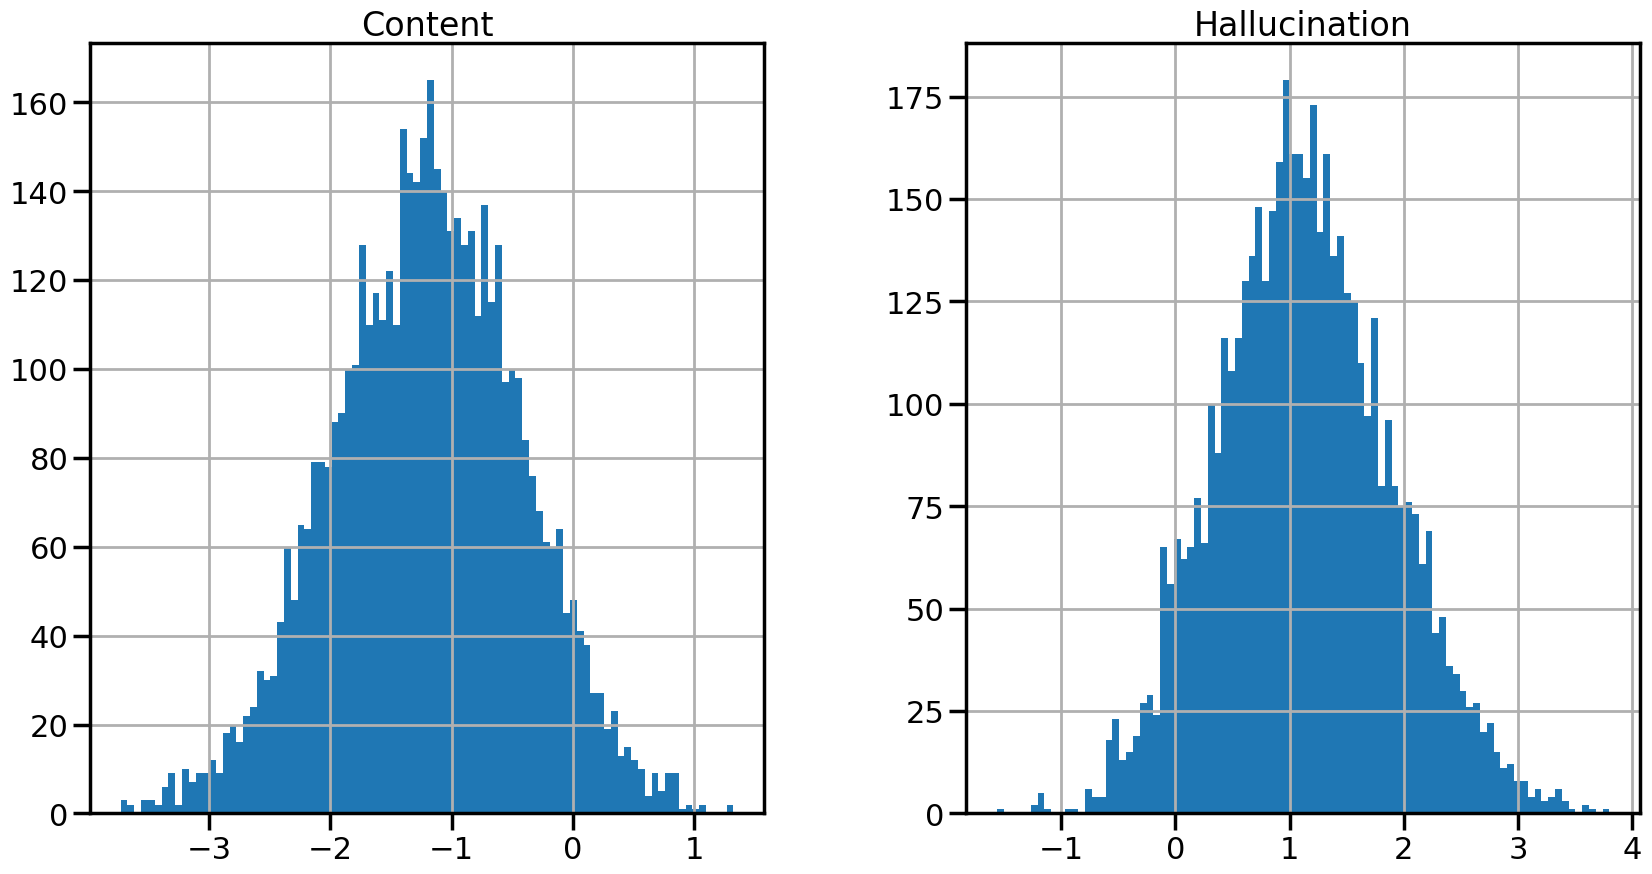

In [100]:
#----------------------------------------------------
# Trying a log-transform of 'Content', 'Hallucination' variables 
# &
# Drop Redundant Variables
#----------------------------------------------------

# exploratory plotting of the histogram of temporary log transform
raw_data.loc[:, ['Content', 'Hallucination']].apply(np.log10).hist(figsize=(20, 10), bins=90)

# since histogram shows the transformation results in normal shape of data, apply the transformation to 'raw_data' permanently.
# Note that the log transform is applied to every data point individually, therefore this transformation may be applied to the raw data directly, even before the train-test splitting of the data.
raw_data.loc[:, ['Content', 'Hallucination']] = raw_data.loc[:, ['Content', 'Hallucination']].apply(np.log10)

# drop redundant variables
raw_data = raw_data.drop(['Concentration','Participant'], axis=1)

<hr style="color: yellow;border-color: yellow;">

###  <span style="color:magenta"> (1.5B) NaNs: Data Cleaning & EDA </span>

In [101]:
#----------------------------------------------------
# Investigating Error Values as Possible NaNs.
#----------------------------------------------------

# Leading on from (1.4Biv) & (1.4Bv); 'Dep_Mood', 'Passive', 'Tired' Variables.

display(md("<h4 style=\"color: magenta\"> Table of values occurring in 'Dep_Mood' on the left, with count of their occurrence on the right. </h4> " ))
dep_value_counts = raw_data.loc[:,'Dep_Mood'].value_counts()
display(dep_value_counts)

print(f"Except for zero, every entry in the variable 'Dep_Mood' is unique: {(dep_value_counts >= 2).sum()==1}")
print("\nZero occurs 1075 times in the 'Dep_Mood' column, whereas all other values occur only once. Hence, the zeros will be treated as missing at random entries and subsituted by NaNs. By the same logic, the -999 valued entries from the 'Passive' variable, and inf values from 'Tired' have been investigated, and substituted with NaNs. \n \n'Pregnant' NaNs will be substituted by zeros (later on after the NaN visuals), as justified in (1.4Bvii). ")
raw_data.loc[:, 'Dep_Mood'] = raw_data.loc[:, 'Dep_Mood'].replace(0, np.nan)
raw_data.loc[:, 'Passive'] = raw_data.loc[:, 'Passive'].replace(-999, np.nan)
raw_data.loc[:, 'Tired'] = raw_data.loc[:, 'Tired'].replace(np.inf, np.nan)
display(md("<hr style=\"color: grey\"> " ))

<h4 style="color: magenta"> Table of values occurring in 'Dep_Mood' on the left, with count of their occurrence on the right. </h4> 

0.000000     1075
8.177884        1
9.329118        1
8.902610        1
5.547764        1
             ... 
6.390159        1
5.400282        1
5.261404        1
10.122735       1
5.546932        1
Name: Dep_Mood, Length: 3926, dtype: int64

Except for zero, every entry in the variable 'Dep_Mood' is unique: True

Zero occurs 1075 times in the 'Dep_Mood' column, whereas all other values occur only once. Hence, the zeros will be treated as missing at random entries and subsituted by NaNs. By the same logic, the -999 valued entries from the 'Passive' variable, and inf values from 'Tired' have been investigated, and substituted with NaNs. 
 
'Pregnant' NaNs will be substituted by zeros (later on after the NaN visuals), as justified in (1.4Bvii). 


<hr style="color: grey"> 

 <h4 style="color: magenta"> Bar Chart Visual Showing Count & Percentage of NaNs </h4> 

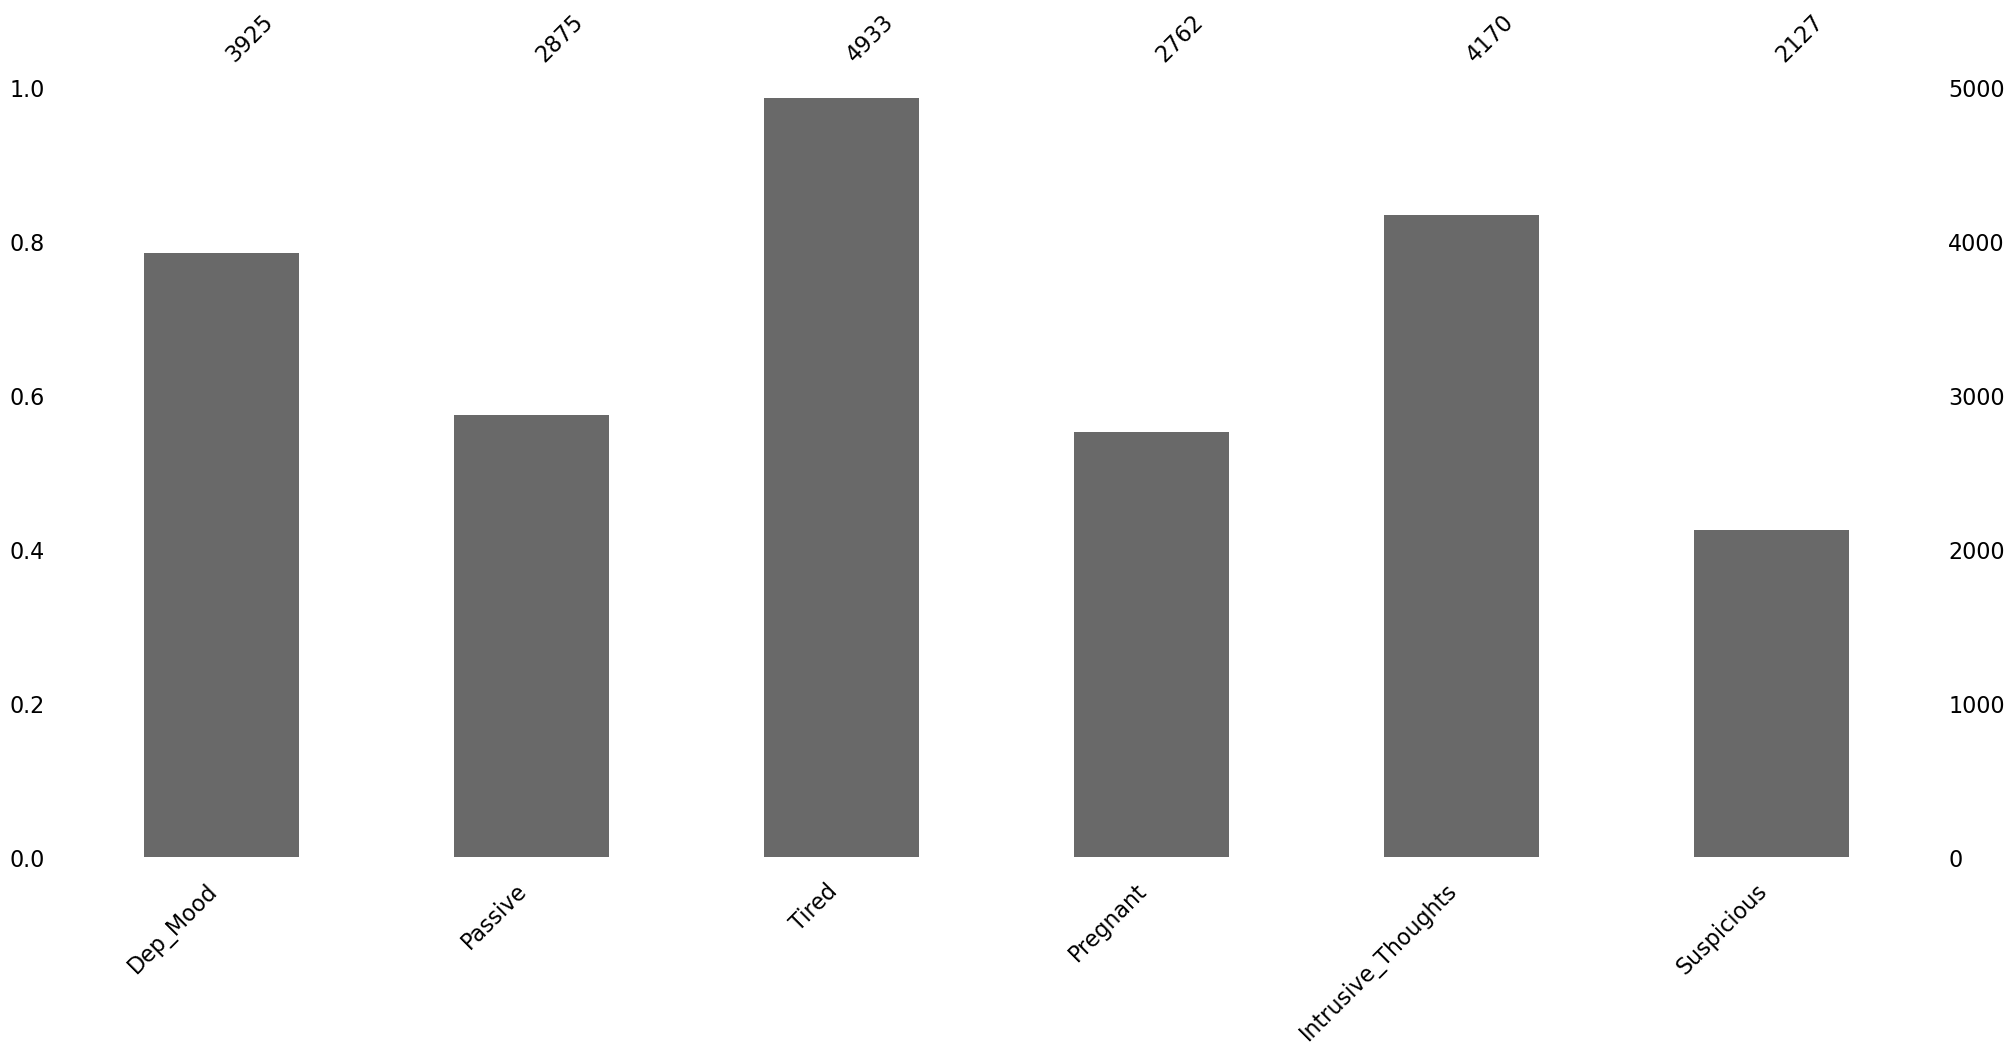

<hr style="color: grey"> 

<h4 style="color: magenta"> Heatmap Visual Showing Distribution of NaNs Sitting in Data </h4> 

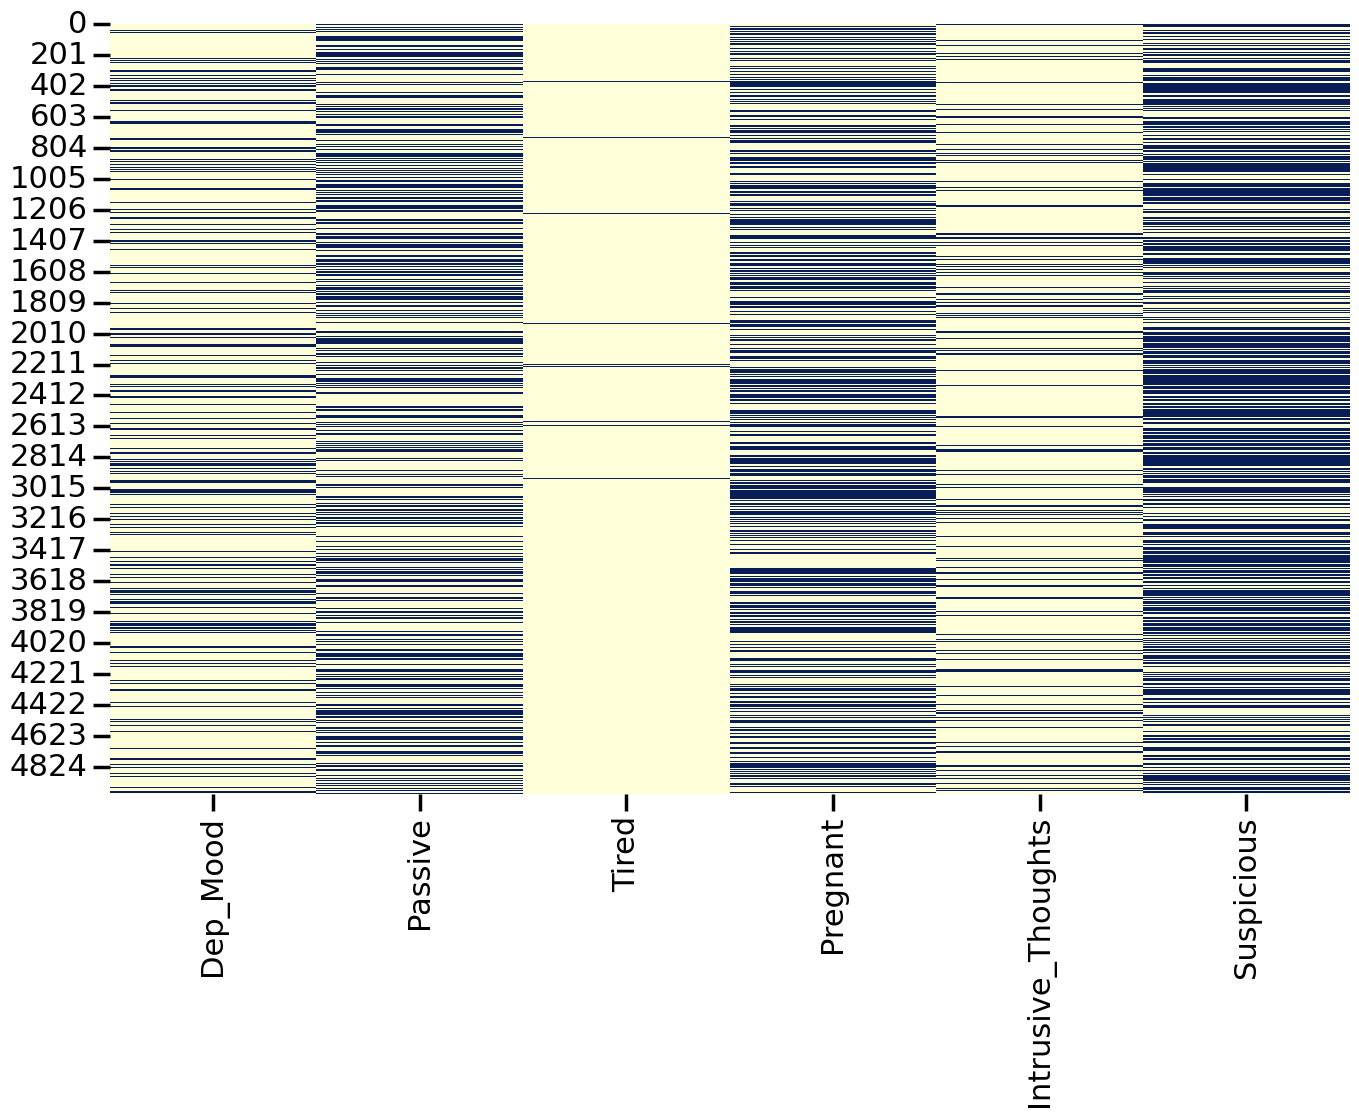

<hr style="color: grey"> 

<h4 style="color: magenta"> Updated Histograms of Variables that have NaNs </h4> 

The variables that previously had erroneous values were either not displaying a histogram plot at all, or displaying incorrectly scaled histograms. The updated histograms below are correctly scaled, they show normal distribution for all variables except 'Pregnant', which .


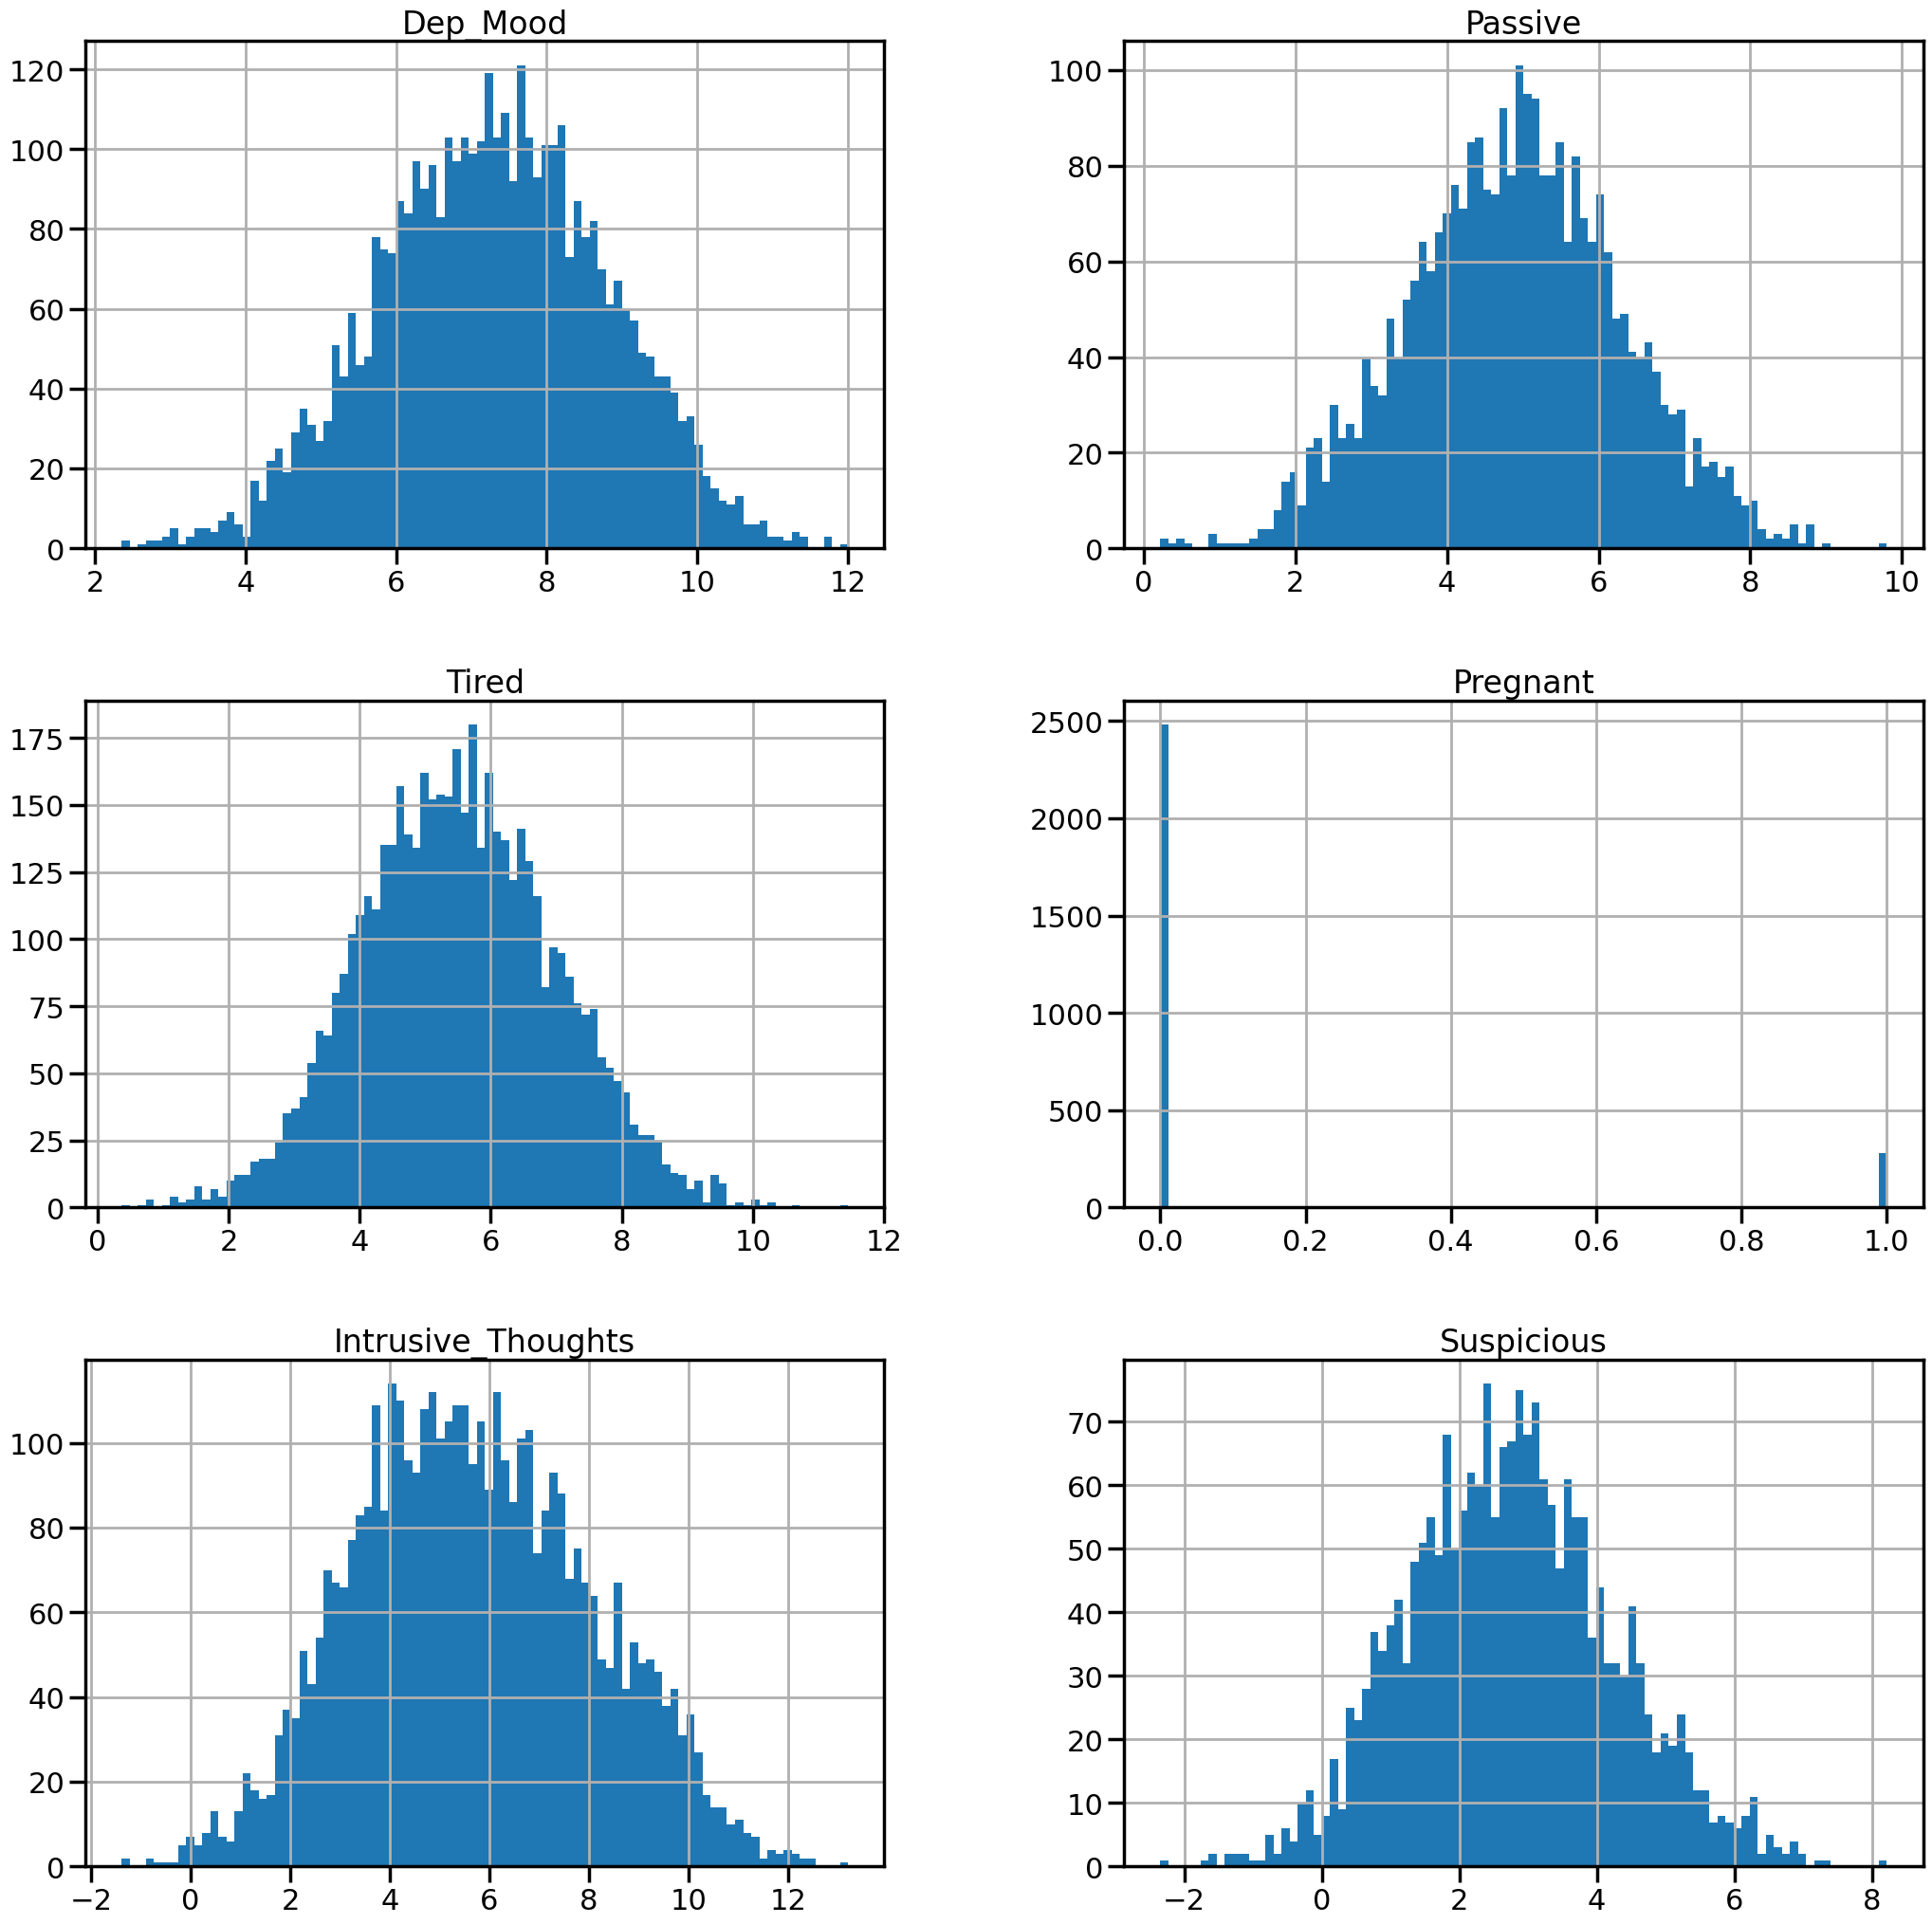

<hr style="color: grey"> 

In [102]:
#----------------------------------------------------
# Visualising Volume and Distribution of NaNs
#----------------------------------------------------

vars_with_nan_df = raw_data.loc[:, ['Dep_Mood', 'Passive', 'Tired', 'Pregnant', 'Intrusive_Thoughts', 'Suspicious']]

display(md("<hr style=\"color: grey\"> " ))

# missingno module visual of NaN's
display(md(" <h4 style=\"color: magenta\"> Bar Chart Visual Showing Count & Percentage of NaNs </h4> " ))
msno.bar(vars_with_nan_df) 
plt.show()
display(md("<hr style=\"color: grey\"> " ))

# SNS Heatmap module visual showing distribution of NaN's
display(md("<h4 style=\"color: magenta\"> Heatmap Visual Showing Distribution of NaNs Sitting in Data </h4> " ))
plt.figure(figsize=(16,10))
sns.heatmap(vars_with_nan_df.isnull(), cbar=False, cmap="YlGnBu")
plt.show()
display(md("<hr style=\"color: grey\"> " ))

# plot histograms of the non-nan values of vars_with_nan_df; plots show normal distribution of all vars (except 'Pregnant' which is binary)
display(md("<h4 style=\"color: magenta\"> Updated Histograms of Variables that have NaNs </h4> " ))
print("The variables that previously had erroneous values were either not displaying a histogram plot at all, or displaying incorrectly scaled histograms. The updated histograms below are correctly scaled, they show normal distribution for all variables except 'Pregnant', which .")
vars_with_nan_df.hist(figsize=(25,25), bins=90)
plt.show()
display(md("<hr style=\"color: grey\"> " ))

In [103]:
#----------------------------------------------------
# Replace 'Pregnant' NaNs with zeros 
#----------------------------------------------------

raw_data.loc[:, 'Pregnant'] = raw_data.loc[:, 'Pregnant'].replace(np.nan, 0)


In [104]:
#----------------------------------------------------
# Pearson's Coefficient Table - Post Data Transformation
#----------------------------------------------------

display(md("<h4 style=\"color: magenta\"> Pearson's Coefficient Table - Post Data Transformation </h4> " ))

pearson_corr = raw_data.corr()
mask = np.zeros_like(pearson_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
pearson_corr[mask] = np.nan
display((pearson_corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
 .format(precision=2)
 ))

<h4 style="color: magenta"> Pearson's Coefficient Table - Post Data Transformation </h4> 

,Diagnosis,Anhedonia,Apathy,Appetite,Content,Delusion,Dep_Mood,Focus,Hallucination,Intrusive_Thoughts,Passive,Pregnant,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal,Sex_Male,Housing_Unstable,Race_Asian,Race_Black,Race_Hispanic,Race_White,Delay_Yes
Diagnosis,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Anhedonia,-0.33,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Apathy,0.32,-0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Appetite,-0.01,0.03,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Content,-0.29,0.09,-0.09,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Delusion,0.41,-0.14,0.15,-0.01,-0.14,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Dep_Mood,-0.25,0.06,-0.10,-0.02,0.07,-0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Focus,0.33,-0.10,0.11,-0.02,-0.08,0.12,-0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Hallucination,0.34,-0.11,0.10,-0.01,-0.11,0.82,-0.09,0.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Intrusive_Thoughts,-0.55,0.20,-0.18,0.02,0.18,-0.23,0.12,-0.17,-0.19,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<hr style="color: yellow;border-color: yellow;">

###  <span style="color:magenta"> (1.6) Section 1 - Overview & Conclusions  </span>

    - Feature Selection

* Two redundant variables, 'Focus' and 'Participant have been dropped from the data set.
* [93.48% of all data points in the binary variable 'Housing' are in the 'Stable' category, giving reason for consideration of dropping the variable. However, due to domain knowledge, this feature will be kept in the data set. This is because of the impact of stable/unstable housing on mental health is well documented.](https://assets.ctfassets.net/6sxvmndnpn0s/59MBno13nAzVDGZeSjiJkX/3c2b8e75becb0e3f10057f696c95c284/Housing_and_mental_health_-_detailed_report.pdf)
- 42.54% and 44% of the overall data is missing in the variables 'Suspicious' and 'Passive' respectively. Due to the volume of missing data, dropping the variables may be considered. However, both variables will be maintained in the data set because of domain knowledge shows the potential for their siginificance as an accompanying symptom of ill mental health. (See [1](https://my.clevelandclinic.org/health/diseases/9784-paranoid-personality-disorder) and [2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7612671/)) 


    - Missing Values
* The heatmap of missing values does not suggest evidence of any pattern to the missingness, it was therefore assumed that values are missing at random or missing completely at random, meaning they can be imputed. All variables with missing values were imputed using the mean.

    - Encoding, Transformation and Distribution of Variables
* As part of data pre-processing, the variables 'Delay', 'Housing', 'Sex', 'Race' were encoded into binary numerical form, with 'Race' converted into 4 separate binary variables of 'White', 'Black', 'Asian' and 'Hispanic'.
* 'Content' and 'Hallucination' had an exponential distribution, but after a log-transform became normally distributed.
* After preprocessing, 18 out of the 26 variables have normal distribution, with the remaining 8 being binary categorical variables.

    - Correlations

[Pearson's correlation is a statistic that describes the level of linear association between any two normally distributed variables. ](https://journals.lww.com/anesthesia-analgesia/fulltext/2018/05000/correlation_coefficients__appropriate_use_and.50.aspx)
<br><br>
Note in the that the values in the "Pearson's Coefficient Table - Post Data Transformation", the log-transformed variables have now changed due to the applied transformation. In particular, the transformation has revealed a correlation of 0.82 between 'Delusion' and 'Hallucination'.
<br><br>
In fact, there are many correlations above abs(0.4), and in particular, there are 4 pairs with correlation above abs(0.8) :

* Apathy - Unusual Thought
* Delusion - Hallucination
* Intrusive Thoughts - Rumination
* Stress - Tension
<hr style="color: gray;">

<hr style="color: yellow;border-color: yellow;">

##  <span style="color:magenta"> (2) Dimension Reduction </span>

<hr style="color: yellow;border-color: yellow;">

###  <span style="color:magenta"> (2.1) Train-Test Splitting, Feature Scaling, Exploratory PCA </span>

PCA is a statistical technique that acts as a feature extraction tool. It reduces dimensionality by extracting 'principal components' from the data - these are orthogonal linear combinations of the original variables. In this context, 'orthogonality' means that the principal component vectors, which sit in the hyperplane of the original feature space, are such that they are at a 90 degree angle, so that their orthogonal projection onto one another is pairwise zero for any two principal components. Intuitively, principal components are selected in a manner that 'explains' or 'captures' as much of the variance within the data as possible. 
(See [1](https://link.springer.com/book/10.1007/b98835), [2]())

<br>
Since 18 out of the 26 variables in our data set are normally distributed, and since the Pearson correlation matrix shows several sets of highly correlated variables (including 4 sets of correlations above 0.8), PCA may be considered a suitable dimension reduction method for this data.


In [105]:
#----------------------------------------------------
# stratified train-test split 80-20%
#----------------------------------------------------

#  (stratified by the response, 'Diagnosis', and 'Housing_Unstable', one of the predictors)
X = raw_data.iloc[:,1:]
y = raw_data['Diagnosis']
X_train, X_test, y_train, y_test  = train_test_split( X, y, test_size = 0.2, random_state=10, stratify=raw_data.loc[:, ['Diagnosis', 'Housing_Unstable']])


#----------------------------------------------------
# Impute all NaNs in training data (X_train) with mean value of the training data
#----------------------------------------------------
X_train = X_train.fillna(X_train.mean())


#----------------------------------------------------
# Feature Scaling: MinMax Scaling
#----------------------------------------------------
scaler = preprocessing.MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

Number of principal components extracted: 26 
Total percentage of variance explained: 1.00000
Total percentage of variance explained by PC1, PC2 and PC3: 0.5197245335000645


<h4 style="color: magenta"> (2.1A) Percentage of variance explained by each principal component </h4> 

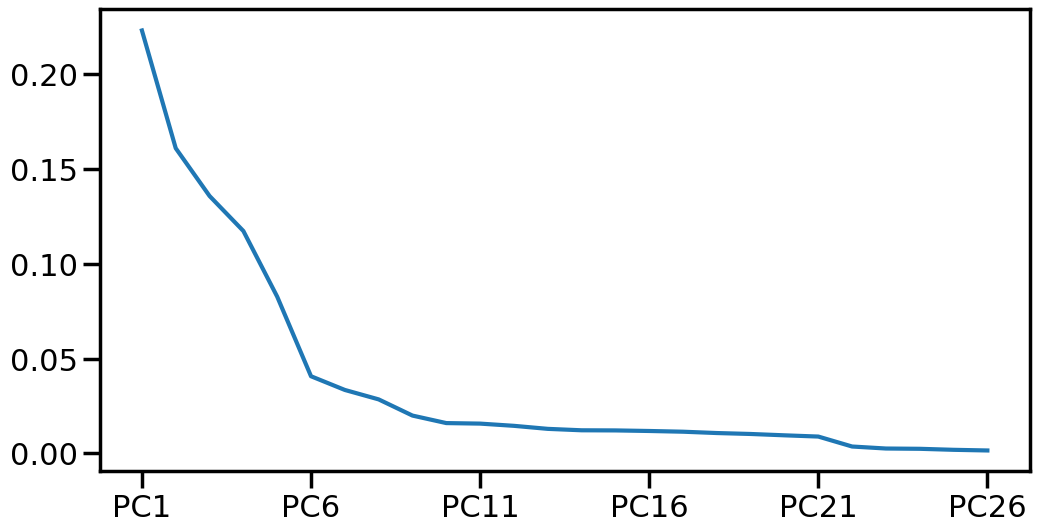

<hr style="color: grey"> 

<h4 style="color: magenta"> (2.1B) Loadings of principal components in terms of the original features </h4> 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
Anhedonia,-0.02,-0.03,-0.00,0.01,-0.00,-0.15,0.10,-0.01,-0.08,-0.12,0.04,-0.03,0.04,0.20,0.20,0.10,0.09,-0.45,-0.78,-0.14,0.10,0.01,-0.03,-0.01,0.02,-0.01
Apathy,0.03,0.03,-0.00,-0.01,-0.01,0.24,-0.15,-0.01,-0.65,-0.12,-0.01,0.05,0.02,0.00,-0.02,0.02,-0.00,0.00,-0.01,0.03,0.02,-0.02,0.45,0.53,0.02,-0.03
Appetite,0.00,-0.00,-0.00,0.00,-0.01,0.01,-0.01,-0.02,-0.04,0.01,0.11,-0.17,-0.32,0.57,0.44,-0.10,-0.54,0.05,0.14,0.08,0.02,-0.01,-0.00,0.00,-0.01,0.01
Content,-0.05,-0.03,-0.01,0.02,-0.02,-0.16,0.10,0.04,-0.04,-0.09,0.29,0.78,-0.07,-0.03,0.12,-0.18,-0.04,-0.01,0.05,-0.02,0.07,-0.44,-0.00,-0.02,0.01,-0.01
Delusion,0.02,0.04,0.00,-0.02,0.01,0.19,-0.15,-0.03,0.20,-0.52,-0.22,0.09,-0.00,0.04,0.04,0.00,-0.03,0.02,0.00,0.01,-0.01,0.01,0.01,-0.04,0.74,0.13
Dep_Mood,-0.03,-0.00,-0.00,0.03,0.01,-0.11,0.07,-0.01,-0.03,0.00,-0.12,0.03,-0.01,-0.10,-0.14,0.03,-0.27,0.69,-0.48,0.31,0.25,-0.02,-0.01,-0.01,-0.00,0.01
Focus,0.03,0.03,-0.01,-0.01,0.01,0.18,-0.09,-0.01,0.10,0.14,0.04,0.08,0.55,0.43,-0.42,-0.46,-0.18,-0.08,-0.10,0.02,-0.05,0.00,0.02,-0.01,0.00,-0.01
Hallucination,0.02,0.04,-0.00,-0.02,0.00,0.19,-0.15,-0.04,0.24,-0.60,-0.26,0.11,0.01,0.05,0.05,0.01,-0.02,0.02,-0.01,0.02,-0.02,-0.01,0.01,0.02,-0.65,-0.09
Intrusive_Thoughts,-0.05,-0.12,-0.07,-0.01,-0.00,-0.21,0.14,-0.03,-0.10,-0.36,0.33,-0.23,0.12,0.03,-0.16,-0.03,-0.01,0.08,0.11,-0.08,0.06,-0.04,-0.58,0.45,0.03,0.01
Passive,0.00,0.00,-0.00,-0.00,-0.01,0.01,0.02,-0.00,-0.01,-0.02,0.12,0.02,0.02,-0.07,0.10,-0.00,-0.08,0.27,-0.22,-0.24,-0.89,-0.01,0.00,0.02,0.00,0.00


In [106]:
#----------------------------------------------------
# Exploratory PCA
#----------------------------------------------------

# exploratory PCA; 
# we can input either number of components or % of variance that we want to be explained by pca; 
# start with a number as close to 100%, in order to explore the outputted principal components
pca = PCA(n_components=0.9999999999999) 
pca.fit(X_train)
print(f"Number of principal components extracted: {pca.n_components_} \nTotal percentage of variance explained: {pca.explained_variance_ratio_.sum():.5f}")
print(f"Total percentage of variance explained by PC1, PC2 and PC3: {pca.explained_variance_ratio_[:3].sum()}")

# Table & line graph of % of variance explained by each principal component
display(md("<h4 style=\"color: magenta\"> (2.1A) Percentage of variance explained by each principal component </h4> " ))
col_names = [f"PC{i+1}" for i in range(pca.explained_variance_ratio_.size)]
pd.Series(pca.explained_variance_ratio_, index=col_names).plot(figsize=(12, 6))
plt.show()
display(md("<hr style=\"color: grey\"> " ))

# loadings of each principal component in terms of the original features
display(md("<h4 style=\"color: magenta\"> (2.1B) Loadings of principal components in terms of the original features </h4> " ))
loadings = pd.DataFrame(pca.components_.T, columns=col_names, index=X_train.columns)
display((loadings
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
 .format(precision=2)
 ))

In [107]:
#----------------------------------------------------
# PCA
#----------------------------------------------------

pca = PCA(n_components=0.95) 
pca.fit(X_train)
pca_train = pca.transform(X_train)

# need to find a way to deal with nans in testing data to be able to do pca transform. 
# for now, impute all NaNs in test data (X_test) with mean value of the test data
X_test = X_test.fillna(X_test.mean())
pca_test = pca.transform(X_test)


###  <span style="color:magenta"> (2.2) Analysis of Exploratory PCA </span>

* Table (2.1A) shows that there is a clear elbow shape in the line graph of the percentage of variance explained by PCA after the 6th, 10th, and 21st principal components. 

* As mentioned previously, principal components are linear combinations of the original variables. [This means that each principal component is a sum of the original variables, where each of the variables is multiplied by some scalar; the scalars by which the variable is multiplied is called the 'loading' of that variable for that particular principal component.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4792409/)) The loadings table for our data reveals interesting aspects of the inner variance of the data.

    * 'Sex_Male', 'Race_White' and 'Delay_Yes' are the only variables with that have significant loading scores for the first three principal components - which jointly account for 51.972% of the data.

    * The loadings for PC4 are almost exclusively related to the race of participants and 'Delay_yes'.
    
    * Loadings for PC8 are almost exclusively related to only one variable,'Pregnant'.

* Having completed the exploratory PCA, the standard cut off of 95% of variance explained will be used to transform the 

<hr style="color: yellow;border-color: yellow;">

##  <span style="color:magenta"> (3) Supervised Machine Learning </span>

<hr style="color: yellow;border-color: yellow;">

###  <span style="color:magenta"> (3.1) Logistic Regression </span>



In [108]:
#----------------------------------------------------
# Logistic Regression
#----------------------------------------------------

# Logistic Regression - regular
log_clf = LogisticRegression(random_state=0).fit(X_train, y_train)
log_clf_pred = log_clf.predict(X_test)

# Logistic Regression - pca
log_clf_pca = LogisticRegression(random_state=0).fit(pca_train, y_train)
log_clf_pca_pred = log_clf_pca.predict(pca_test)


#----------------------------------------------------
# Random Forests
#----------------------------------------------------

# Random Forests - regular
rf_clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rf_clf_pred = rf_clf.predict(X_test)

# Random Forests - pca
rf_clf_pca = RandomForestClassifier(random_state=0).fit(pca_train, y_train)
rf_clf_pca_pred = rf_clf_pca.predict(pca_test)

In [112]:
#----------------------------------------------------
# Accuracy Score, Precision Score, Recall Score
#----------------------------------------------------

display(md("<hr style=\"color: grey\"> " ))
display(md("<h4 style=\"color: magenta\"> (3.1A) Measures of model performance - Scores </h4> " ))

print("--------------------------------")
print("AVERAGE PRECISION SCORE: ")
print("--------------------------------")
print(f"Logistic Regression : {met.average_precision_score(y_test, log_clf_pred)}")
print(f"Logistic Regression (PCA): {met.average_precision_score(y_test, log_clf_pca_pred)}")
print(f"Random Forests : {met.average_precision_score(y_test, rf_clf_pred)}")
print(f"Random Forests (PCA): {met.average_precision_score(y_test, rf_clf_pca_pred)}")

print("\n--------------------------------")
print("ACCURACY SCORE: ")
print("--------------------------------")
print(f"Logistic Regression: {met.accuracy_score(y_test, log_clf_pred)}")
print(f"Logistic Regression (PCA): {met.accuracy_score(y_test, log_clf_pca_pred)}")
print(f"Random Forests: {met.accuracy_score(y_test, rf_clf_pred)}")
print(f"Random Forests (PCA): {met.accuracy_score(y_test, rf_clf_pca_pred)}")

print("\n--------------------------------")
print("RECALL SCORE:")
print("--------------------------------")
print(f"Logistic Regression: {met.recall_score(y_test, log_clf_pred)}")
print(f"Logistic Regression (PCA): {met.recall_score(y_test, log_clf_pca_pred)}")
print(f"Random Forests: {met.recall_score(y_test, rf_clf_pred)}")
print(f"Random Forests (PCA): {met.recall_score(y_test, rf_clf_pca_pred)}")

display(md("<hr style=\"color: grey\"> " ))

<hr style="color: grey"> 

<h4 style="color: magenta"> (3.1A) Measures of model performance - Scores </h4> 

--------------------------------
AVERAGE PRECISION SCORE: 
--------------------------------
Logistic Regression : 0.8047257633319262
Logistic Regression (PCA): 0.8496441819050515
Random Forests : 0.5716234632265574
Random Forests (PCA): 0.5549934548854605

--------------------------------
ACCURACY SCORE: 
--------------------------------
Logistic Regression: 0.801
Logistic Regression (PCA): 0.85
Random Forests: 0.614
Random Forests (PCA): 0.555

--------------------------------
RECALL SCORE:
--------------------------------
Logistic Regression: 0.6086956521739131
Logistic Regression (PCA): 0.7114624505928854
Random Forests: 0.7628458498023716
Random Forests (PCA): 0.15217391304347827


<hr style="color: grey"> 

<hr style="color: grey"> 

<h4 style="color: magenta"> (3.1B) Logistic Regression, normal: Confusion Matrix </h4> 

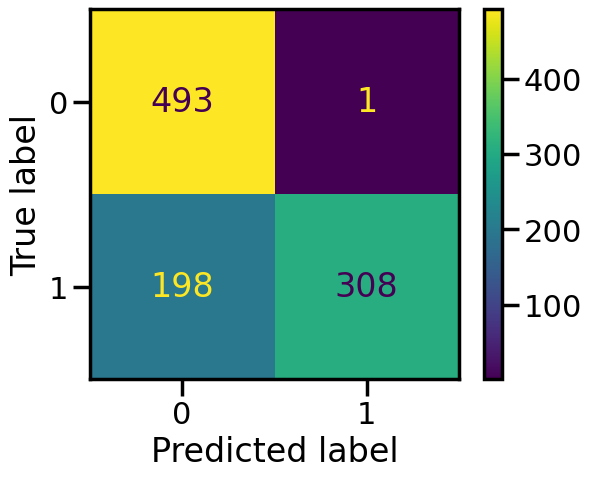

<hr style="color: grey"> 

<h4 style="color: magenta"> (3.1C) Logistic Regression, PCA: Confusion Matrix </h4> 

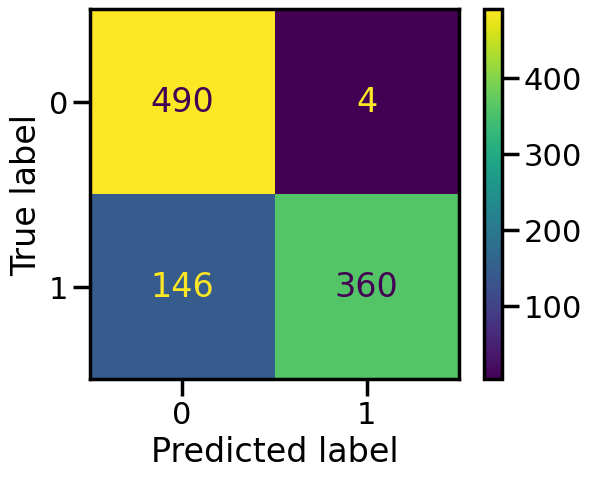

<hr style="color: grey"> 

<h4 style="color: magenta"> (3.1D) Random Forests, normal: Confusion Matrix </h4> 

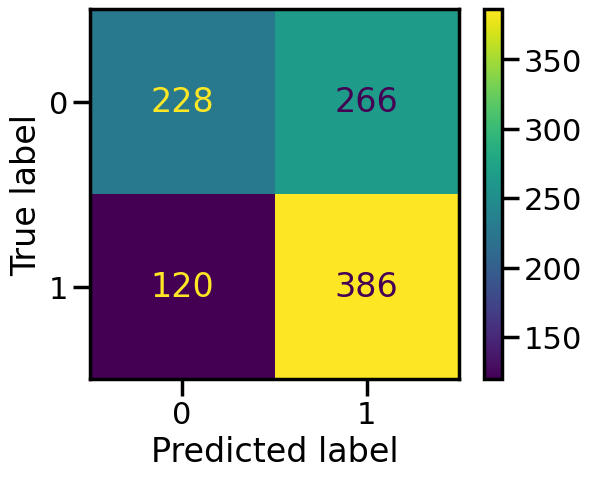

<hr style="color: grey"> 

<h4 style="color: magenta"> (3.1E) Random Forests, PCA: Confusion Matrix </h4> 

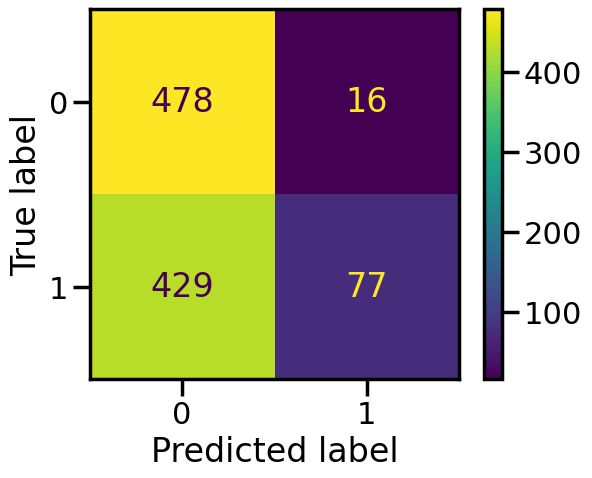

<hr style="color: grey"> 

In [110]:
#----------------------------------------------------
# Confusion Matrixes
#----------------------------------------------------

# Logistic Regression - regular
display(md("<hr style=\"color: grey\"> " ))
display(md("<h4 style=\"color: magenta\"> (3.1B) Logistic Regression, normal: Confusion Matrix </h4> " ))
cm = confusion_matrix(y_test, log_clf_pred, labels=log_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)
disp.plot()
plt.show()
display(md("<hr style=\"color: grey\"> " ))

# Logistic Regression - pca
display(md("<h4 style=\"color: magenta\"> (3.1C) Logistic Regression, PCA: Confusion Matrix </h4> " ))
cm = confusion_matrix(y_test, log_clf_pca.predict(pca_test), labels=log_clf_pca.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)
disp.plot()
plt.show()
display(md("<hr style=\"color: grey\"> " ))

# Random Forests - normal
display(md("<h4 style=\"color: magenta\"> (3.1D) Random Forests, normal: Confusion Matrix </h4> " ))
cm = confusion_matrix(y_test, rf_clf.predict(X_test), labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
plt.show()
display(md("<hr style=\"color: grey\"> " ))

# Random Forests - pca
display(md("<h4 style=\"color: magenta\"> (3.1E) Random Forests, PCA: Confusion Matrix </h4> " ))
cm = confusion_matrix(y_test, rf_clf_pca.predict(pca_test), labels=rf_clf_pca.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf_pca.classes_)
disp.plot()
plt.show()
display(md("<hr style=\"color: grey\"> " ))


<hr style="color: yellow;border-color: yellow;">

###  <span style="color:magenta"> (3.2) Section Summary </span>
* For both logistic regression and random forests, all the scores for average precision, accuracy and recall were higher for models that were trained on data on which PCA was performed first - with the exception of the recall score for random forests. It may be concluded therefore, that data whose dimension has been reduced through PCA has delivered better performance, in this case.

* The performance of random forests models appears poor relative to logistic regression models; its' precision and accuracy scores (for data with and without PCA) range between 0.576 and 0.748 - not a very strong result considering that there are two categories in the response itself.

* By contrast, all the precision and accuracy scores for logistic regression are above 0.8.

* Therefore, out of the two models, based on the accuracy scores and the average precision scores, it appears that logistic regression model has a significantly higher performance. 

* Logistic Regression with PCA appears to be a strong model, with an accuracy and precision score of  0.85 for both (which is around 0.05 higher than logistic regression with regular data), and the third highest recall score (which is 0.1 higher that regular logistic regression). [We note that the advantage of using logistic regression in this instance was that it did not assume a linear relationship between the predictors and response, and does not require the normal distribution of residuals, or homoskedasticity. The better performance of logistic regression for PCA compared to no PCA can be explained also by the fact that logistic regression requires little or no correlation of the predictors with each other. Through PCA, the predictors have been reduced into principal components, who are orthogornal and hence have zero correlation with each other - hence the higher performance of the model.](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/)

* [Nevertheless, the significance of false negatives in the some field, including medicine, must be noted. Depending on the context, the danger of failing to diagnose a patient with a medical condition can be too great to overlook; from this perspective, the model with the highest recall score, which is Random Forests (regular) with a recall score of 0.916, might be preferable over the others. ](https://www.journalslibrary.nihr.ac.uk/hta/hta4050/#/abstract)


<hr style="color: yellow;border-color: yellow;">

##  <span style="color:magenta"> (4) Conclusion, Evaluations & Recommendations </span>

* Other dimension reduction techniques might be considered instead of PCA; a potential shortcoming of using PCA on this data could stem from the fact that 8 of the variables were not normally distributed. 

* As logistic reqression typically requires, and performs better, with a large sample size, a recommendation can be made for future improvements to the model through the use of resampling methods, such as bootstrapping.

<hr style="color: yellow;border-color: yellow;">